#  KING COUNTRY HOUSE PRICE PREDICTION

## ABSTRACT

The main aim is to perform classification and regression using various techniques along with hyper-parameter tuning in order to predict the price for the housing dataset. And finally come up with the best model which better predicts the target variable, price here.

**DATASET:**

The original dataset for King County House Price prediction can be found on [https://www.kaggle.com/harlfoxem/housesalesprediction/home](https://www.kaggle.com/harlfoxem/housesalesprediction/home)  This dataset contains house sale prices for King County, which includes Seattle. It includes houses sold between May 2014 and May 2015. Here, a cleaned dataset is being used where the categorical features are already one-hot encoded.

Below is the description of the dataset used : 

1. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features. 
2. bedrooms :- It determines number of bedrooms in a house. 
3. bathrooms :- It determines number of bathrooms in a bedroom of a house. 
4. sqft_living :- It is the measurement variable which determines the measurement of house in square foot. 
5. sqft_lot : It is also the measurement variable which determines square foot of the lot. 
6. floors: It determines total floors means levels of house. 
7. waterfront : This feature determines whether a house has a view to waterfront; 0 means no, 1 means yes. 
8. view : This feature determines whether a house has been viewed or not; 0 means no, 1 means yes. 
9. condition : It determines the overall condition of a house on a scale of 1 to 5. 
10. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11 
11. sqft_above : It determines square footage of house apart from basement. 
12. sqft_basement : It determines square footage of the basement of the house. 
13. yr_built : It detrmines the date of building of the house. 
14. yr_renovated : It detrmines year of renovation of house. 
15. zipcode : It determines the zipcode of the location of the house. 
16. lat : It determines the latitude of the location of the house. 
17. long : It determines the longitude of the location of the house. 
18. sqft_living15 : Living room area in 2015(implies-- some renovations) 
19. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

**METHODS USED:**
* For Part A:
    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier
* For Part B:
    * Logistic Regression
* For Part C:
    * Bagging Algo : Random Forest Regressor
    * Boosting Algo : XGBoost Regressor
* For Part D:
    * Linear Regression with Regression Regularization (Ridge Regression and Lasso Regression)
* For Part E:
    * Decision Tree Regressor

**RESULTS:**

Both classification and regression models are evaluated to find the AUC and accuracy (MAPE) respectively for how well housing price was predicted. Tuned XGBoost model gave highest AUC of about 0.9153 and accuracy (MAPE) of about 87.34% for regression analysis. The results section consisting of combined result table for both classification and regression is present towards the end of jupyter notebook

**CONCLUSION:**

Hence, the conclusion is that a tuned XGBoost model outperforms other models for both classification and regression problem in house price prediction.

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline
import time
import scipy.stats as stats # To calculate coefficient r for different types of variables
from statsmodels.stats.outliers_influence import variance_inflation_factor #To calc VIF to identify multicolinearity

from sklearn.model_selection import train_test_split

In [14]:
# read the data from csv file
features = pd.read_csv("king_county_cleansed.csv")

In [15]:
# peak into the data
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


**OBSERVATION:**

1. There are 51 columns in the data which has a combination of numerical and categorical data.
2. Categorical data columns in this dataset consists of floor, view, condition, grade and zipcode. Hence, all these features are being converted to categorical variables using the technique of one-hot encoding and that justifies the names of the columns, florrs#1.0, grade#1, etc. Also, only top 6 most significant zipcodes are being taken into consideration for further analysis and prediction.
3. For classification with trees, although there is no need to convert categorical variables to dummy variables but the scikit-learn library does not in-built convert it. Hence, the categorical columns are converted to dumy variables.

In [7]:
# Descriptive statistics of the data
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Comments:**

1. Avg price of house sold in King County, USA is $540088

2. Max price of house sold in King County, USA is $7700000
3. Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms
4. Avg area of house is 2079 Sqft with one house having maximum of 13540 Sqft. area

In [80]:
# inspect the data for null values and other attributes
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 52 columns):
index               21613 non-null int64
price               21613 non-null int64
bedrooms            21613 non-null int64
bathrooms           21613 non-null float64
sqft_living         21613 non-null int64
sqft_lot            21613 non-null int64
waterfront          21613 non-null int64
sqft_above          21613 non-null int64
sqft_basement       21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
sqft_living15       21613 non-null int64
sqft_lot15          21613 non-null int64
basement_present    21613 non-null int64
renovated           21613 non-null int64
floors#1.0          21613 non-null int64
floors#1.5          21613 non-null int64
floors#2.0          21613 non-null int64
floors#2.5          21613 non-null int64
floors#3.0          2161

Above information shows that the data is clean and complete and does not have any null values.

C:\Users\amiga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\amiga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\amiga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\amiga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\amiga\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\amiga\Anaconda3\lib\site-packag

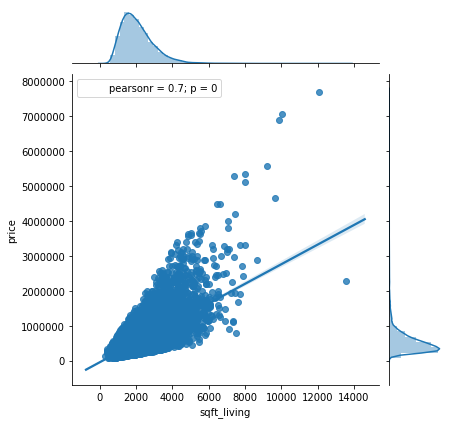

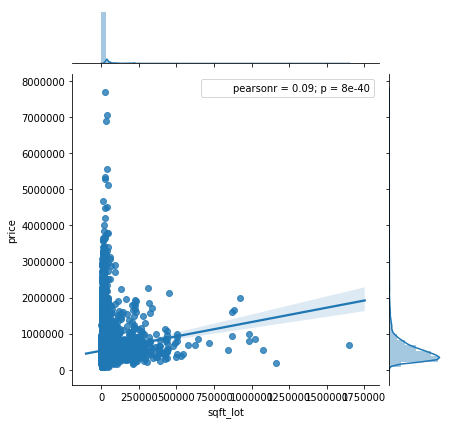

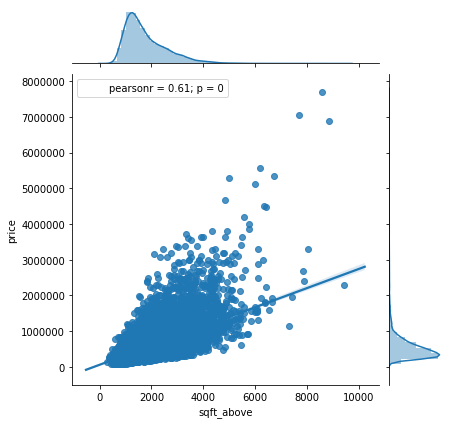

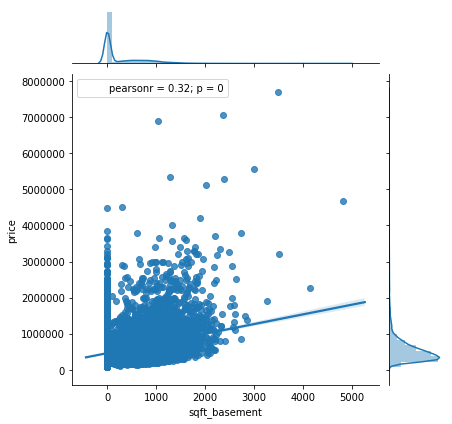

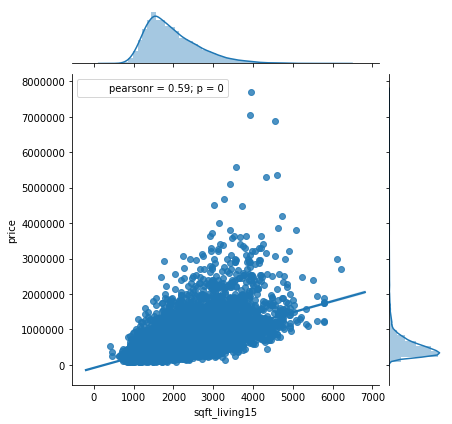

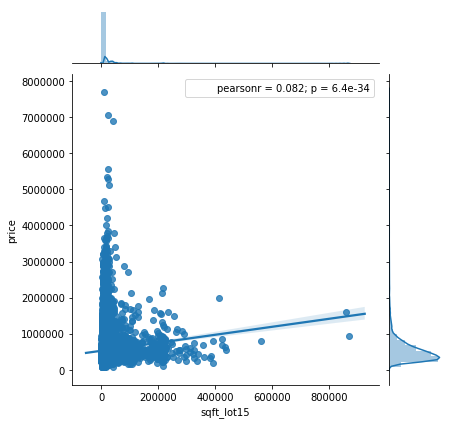

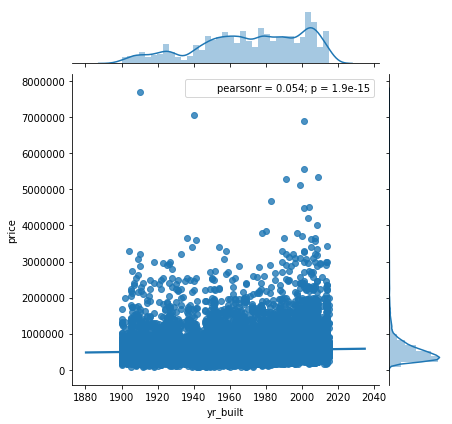

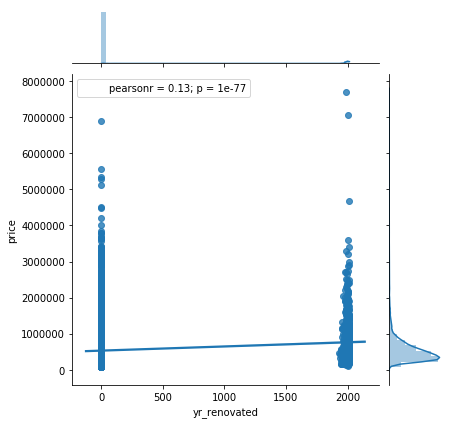

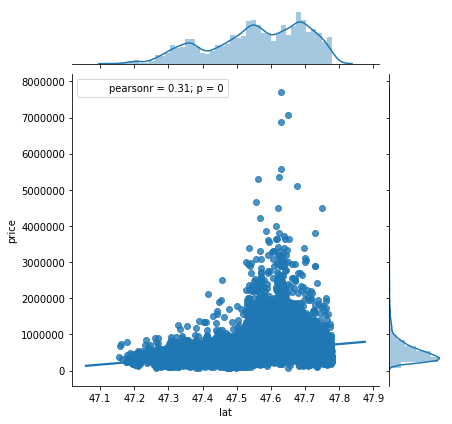

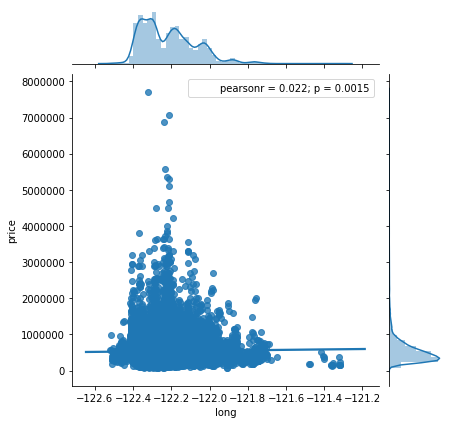

In [6]:
# plot graph for continous variables

j1 = sns.jointplot(x='sqft_living', y='price', data=features, kind='reg', height = 6)
j2 = sns.jointplot(x="sqft_lot", y="price", data=features, kind = 'reg', height = 6)
j3 = sns.jointplot(x="sqft_above", y="price", data=features, kind = 'reg', height = 6)
j4 = sns.jointplot(x="sqft_basement", y="price", data=features, kind = 'reg', height = 6)
j5 = sns.jointplot(x="sqft_living15", y="price", data=features, kind = 'reg', height = 6)
j6 = sns.jointplot(x="sqft_lot15", y="price", data=features, kind = 'reg', height = 6)
j7 = sns.jointplot(x="yr_built", y="price", data=features, kind = 'reg', height = 6)
j8 = sns.jointplot(x="yr_renovated", y="price", data=features, kind = 'reg', height = 6)
j9 = sns.jointplot(x="lat", y="price", data=features, kind = 'reg', height = 6)
j10 = sns.jointplot(x="long", y="price", data=features, kind = 'reg', height = 6)

j1.annotate(stats.pearsonr)
j2.annotate(stats.pearsonr)
j3.annotate(stats.pearsonr)
j4.annotate(stats.pearsonr)
j5.annotate(stats.pearsonr)
j6.annotate(stats.pearsonr)
j7.annotate(stats.pearsonr)
j8.annotate(stats.pearsonr)
j9.annotate(stats.pearsonr)
j10.annotate(stats.pearsonr)

plt.show()

**Comments:** 

1. There is a clear linear association between the variables (r = 0.7), indicating a strong positive relationship. sqft_living should be a good predicator of house price. (note: sqft_living distribution is also skewed to the right)

2. sqft_lot, sqft_lot15, yr_built and long seem to be very poorly related to price (r<0.1)

3. sqft_above and sqft_living15 also seem to be strongly related to price along with sqft_living. Let's analyse their associations using the pairgrid() function from seaborn. This function creates a matrix of axes and shows the relationship for each pair of the selected variables.

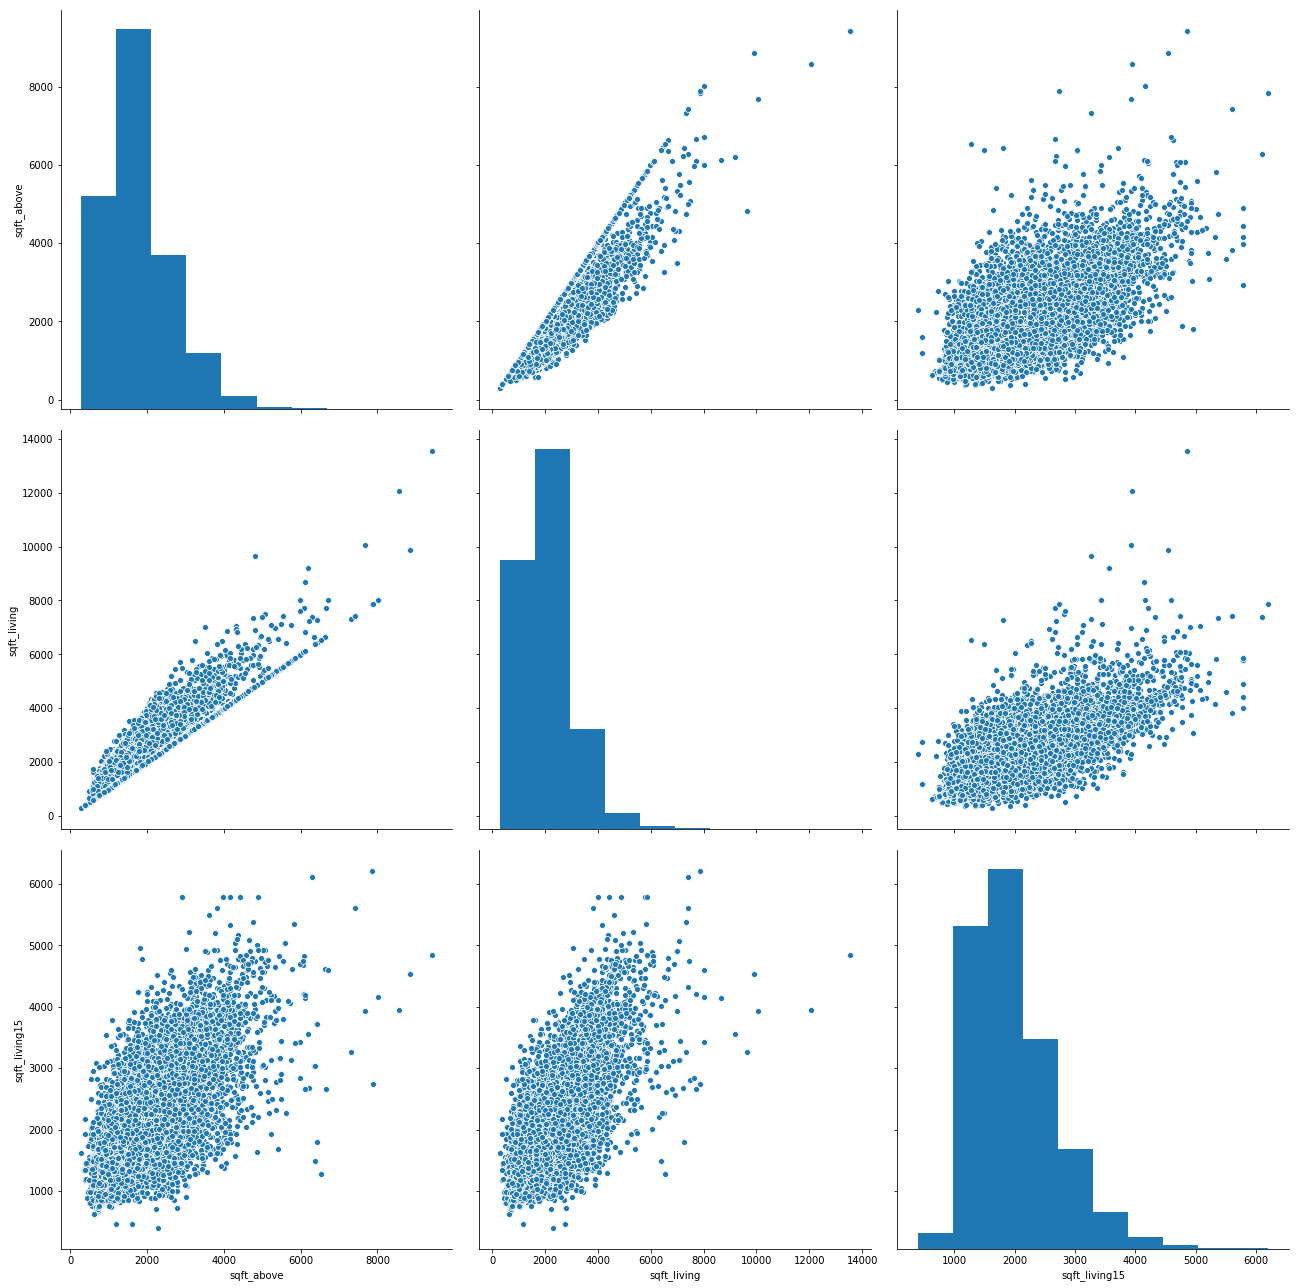

In [7]:
sns.pairplot(features[['sqft_above', 'sqft_living','sqft_living15']], palette='tab20',height=6)

**Comment:**

From the plot above, it is quite evident that the 3 variables have a strong relationship. It was kind of obvious for sqft_above which is equal to sqft_living - sqft_basement. So we know that they both have an impact on price.

Lets now calculate the __Variance Inflation Factor (VIF)__ for the above variables to know if there exists a multicolinearity amongst them.

In [10]:
X = pd.DataFrame()
X['sqft_above'] = features['sqft_above']
X['sqft_living'] = features['sqft_living']
X['sqft_living15'] = features['sqft_living15']

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,25.7,sqft_above
1,30.1,sqft_living
2,15.3,sqft_living15


**Comment:**

From the above values which are much greater than the threshold value of 5, it proves that these 3 variables have multicolinearity amongst them. Hence, we would need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity. From the above scatter plots for each independent variable, the coefficient r for sqft_living is highest (r=0.7) amongst the 3 and so we include only 1 of these variable in the model.

### Inspecting target variable : Price

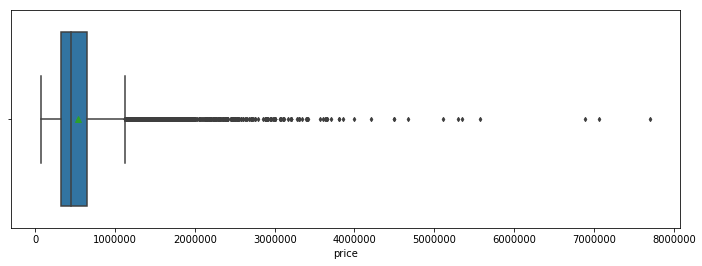

In [82]:
# visualizing the distribution of target variable
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = features, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

**Comment:**

From the above plot, we see that there are a lot of outliers with few houses above $40,00,000. 

If we ignore outliers, the price range is illustrated by the distance between the opposite ends of the whiskers (1.5 IQR) - about 10,00,000$ here.

Also, we can see that the right whisker is slightly longer than the left whisker and that the median line is gravitating towards the left of the box. The distribution is therefore normal and slightly skewed to the right.

### Correlation between features and target variable:

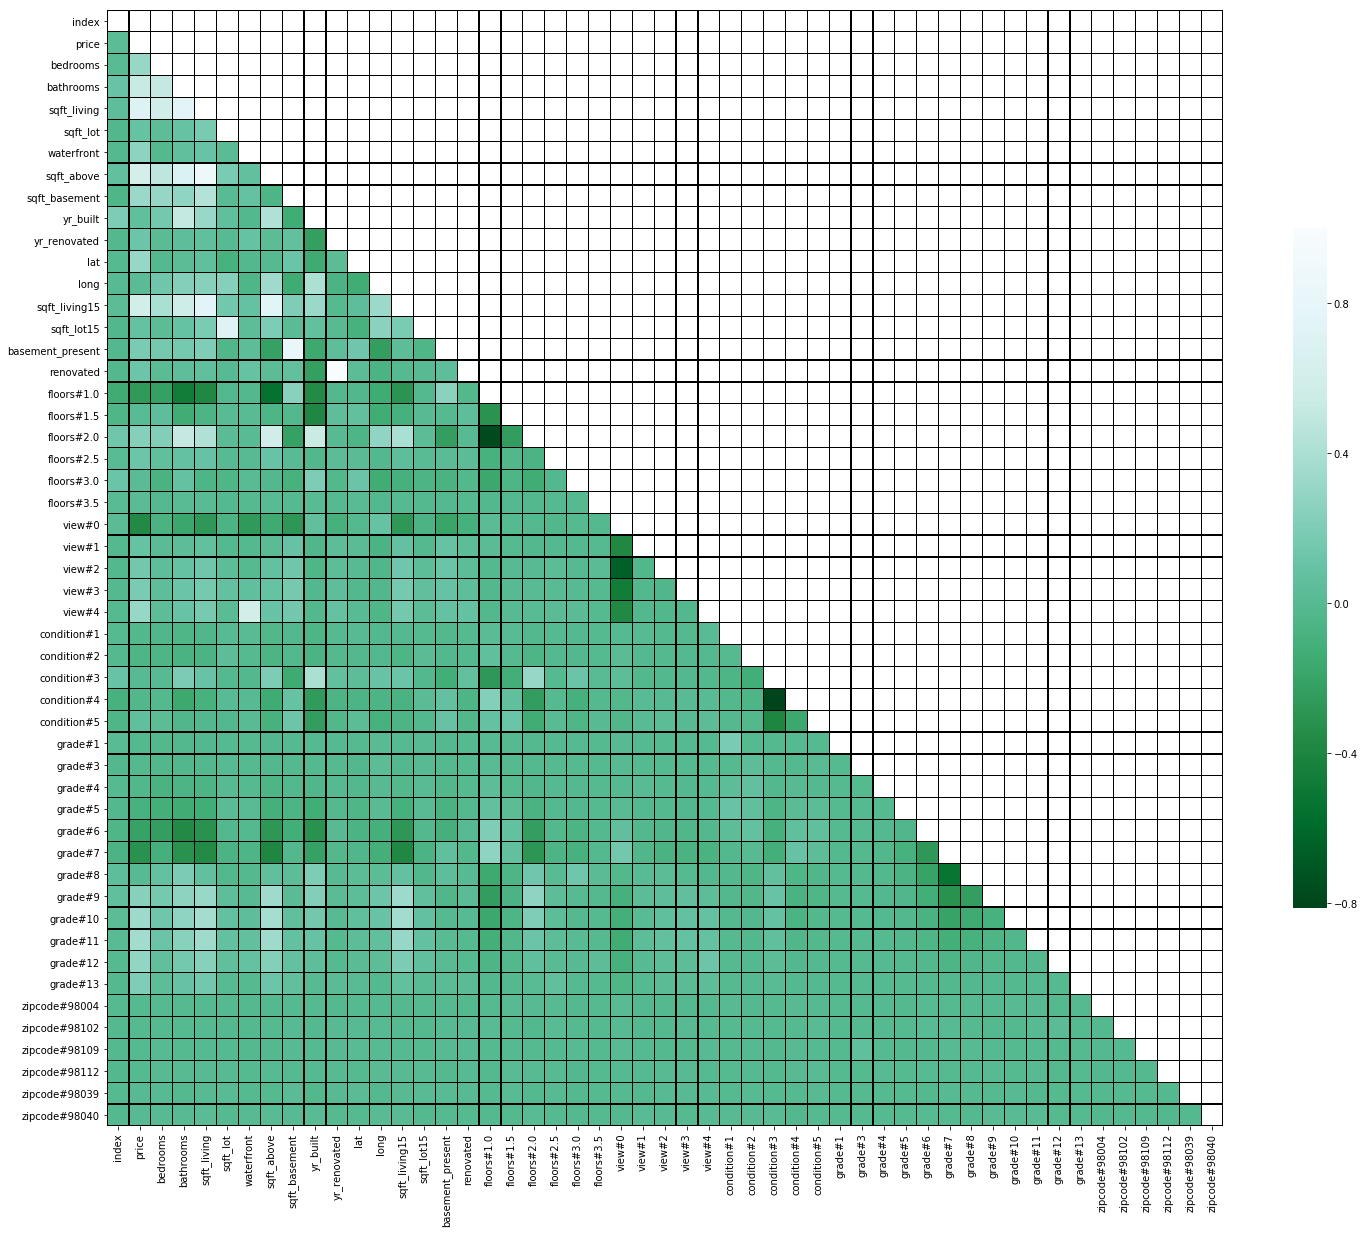

In [26]:
# To find correlation between the features and target variable
corr = features.corr()

# Generate a mask for the upper triangle since such a matrix is symmetrical around its main diagonal
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25,25))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, linewidths=0.25,vmax=1.0, square=True, cmap="BuGn_r", linecolor='k', cbar_kws={"shrink": .5})

#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Comments:**

1. In order to find the correlation between different features, corr() function is being used and plotted on the heatmap.
2. This plot helps us understand the key features, its correlation with target variable price and other features in the dataset.
3. We see that there is higher correlation of columns 'sqft_living' , 'grade' , 'sqft_above' with the price
4. We also see high correlation between the following columns -
    1. Bathroom with sqft_living, grade and sqft_above
    2. sqft_living with grade, sqft_above and sqft_living15
    3. sqft_lot with sqft_lot15
    4. grade with sqft_above, sqft_living, sqft_living15
    5. sqft_above with sqft_living15
5. index column is not useful and not significant hence we can drop that column.

Text(0,0.5,'Features')

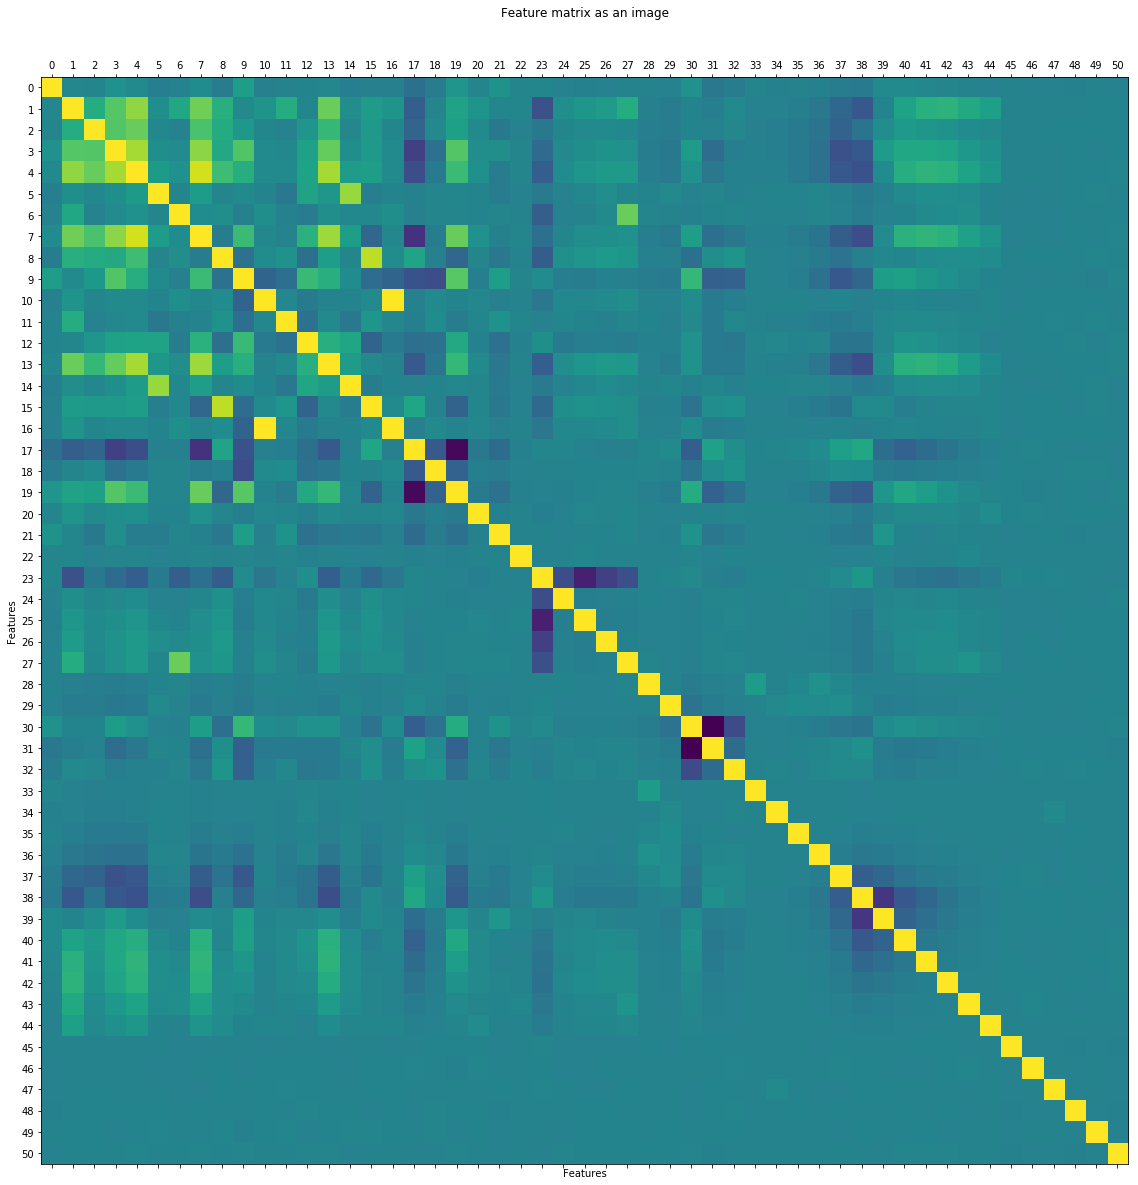

In [57]:
from matplotlib import ticker;

f, ax = plt.subplots(figsize=(20, 20))
ax.matshow(features.corr())

#ax.set_xticklabels([''] + labels)
#ax.set_yticklabels([''] + labels)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
                           
plt.title('Feature matrix as an image')
plt.xlabel("Features")
plt.ylabel("Features")

**Comments:**
1. matshow is a function used to visualize a colored grid/matrix for a raw numerical array
2. Here, the origin is set at the upper left hand corner and rows (first dimension of the array) are displayed horizontally. The aspect ratio of the figure window is that of the array, unless this would make an excessively short or narrow figure
3. The plot also helps us understand the correlation between different features and the target variable but with a better image representation. Here, all the features index, bedrooms, bathrooms, etc are being numbered from 0-50.

In [16]:
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


**Comment:**
Here, the median price is being calculated and an additional row names price_cat is added which contains price < median_price as -1 and otherwise 1. This type of bifercation is done since we need to perform classification where we have to classify the price based on the input features.

Adding column to dataframe for holding categorical price value : HIGH/LOW

All values < median are LOW (-1) and Values >= median are HIGH (1)

In [17]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [18]:
# check if correct categories are created
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [11]:
# price_cat column is concatenated to the features dataframe in the end
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


## CLASSIFICATION TECHNIQUES

## Part A

    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier

## Random Forest Classifier

In [7]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [19]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [20]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a default Random Forest Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# predict on test data
y_pred=clf.predict(X_test)

**Comments:**

n_estimators :
This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees gives better performance but makes the code slower. One should choose as high value as your processor can handle because this makes your predictions stronger and more stable and thus 100 decision trees which is the default is taken into consideration to ensemble the model.

Now, let us evaluate our model by using AUC (Area Under Curve) as the evaluation metric. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.

In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Model Accuracy, how often is the classifier correct?
default_rf_auc = roc_auc_score(y_test, y_pred)
print("Area under the curve for default random forest model is :", default_rf_auc)

Area under the curve for default random forest model is : 0.9040752204356994


In [22]:
# Let us now find out the importance of each feature in the random forest classifier :

feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 2.720910e-01
sqft_living         1.267498e-01
sqft_living15       9.296042e-02
sqft_above          7.046085e-02
long                5.439895e-02
sqft_lot15          5.214811e-02
sqft_lot            4.904731e-02
yr_built            4.731879e-02
bathrooms           4.050365e-02
grade#7             2.781204e-02
sqft_basement       2.734440e-02
grade#9             1.726194e-02
bedrooms            1.694097e-02
grade#8             1.493688e-02
floors#1.0          1.177283e-02
grade#6             1.124281e-02
basement_present    9.370003e-03
view#0              8.274022e-03
floors#2.0          7.043699e-03
condition#3         5.763770e-03
grade#10            4.744185e-03
condition#4         4.449684e-03
condition#5         3.544345e-03
floors#1.5          3.363066e-03
yr_renovated        3.048817e-03
view#2              2.218445e-03
renovated           1.870537e-03
zipcode#98004       1.463865e-03
view#4              1.310992e-03
floors#3.0          1.216292e-03
view#3    

In [18]:
# look at the top 10 features

top_features = feature_imp.head(10)
top_features

lat              0.272595
sqft_living      0.113825
sqft_living15    0.094178
sqft_above       0.071953
long             0.054609
sqft_lot15       0.053920
yr_built         0.050305
sqft_lot         0.046563
bathrooms        0.037762
grade#7          0.036943
dtype: float64

No handles with labels found to put in legend.


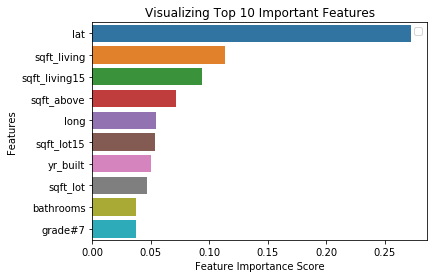

In [20]:
# Creating a bar plot for the above top 10 features

sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.legend()
plt.show()

**Comment:**

From this graph, it is clear that the latitude of the house plays a vital role in prediction of price followed by the sqft_living, sqft_living15 and sqft_above. The importance of other features is around 0.05 score for house price prediction.

In [23]:
from pprint import pprint

In [24]:
# Let us look at the parameters used for training the model using default random forest classifier

print('Parameters currently in use:\n')
rf_params = clf.get_params()
print(rf_params)

Parameters currently in use:

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


### Finding important hyper-parameters using RandomSearchCV

In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
# Tuning modeol parameters to find the important one's

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 6, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [50, 112, 175, 237, 300]}


In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [50, 112, 175, 237, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [28]:
rf_random_best_params = rf_random.best_params_
print("Best hyperparameters for random forest classifier as per randomised search are : \n", rf_random_best_params)

Best hyperparameters for random forest classifier as per randomised search are : 
 {'n_estimators': 175, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [29]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluate Random Search

In [30]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    AUC = auc(false_positive_rate, true_positive_rate)
    return AUC

In [31]:
tuned_rf_random = rf_random.best_estimator_

In [33]:
rf_default = evaluate(rf_base,X_train,y_train, X_test, y_test)
rf_random_tuned = evaluate(tuned_rf_random,X_train,y_train, X_test, y_test)
print('AUC for default random forest model : ' + str(rf_default))
print('AUC for tuned random forest model : ' + str(rf_random_tuned))

AUC for default random forest model : 0.8961855271485369
AUC for tuned random forest model : 0.9068543333801434


### Finding important hyper-parameters using GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [3,5,7,10],
    'n_estimators': [100, 150, 200, 250]
}

# Create a based model
clf = RandomForestClassifier()

# Instantiate the grid search model with 3 fold cross validation
rf_grid = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [37]:
# fit the grid search model on the training data
rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 10.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [3, 5, 7, 10], 'n_estimators': [100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [38]:
rf_grid_best_params = rf_grid.best_params_
print("Best hyperparameters for random forest classifier as per grid search are : \n", rf_grid_best_params)

Best hyperparameters for random forest classifier as per grid search are : 
 {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}


In [39]:
tuned_rf_grid = rf_grid.best_estimator_

In [41]:
default_auc = evaluate(rf_base,X_train,y_train, X_test, y_test)
rf_grid_tuned_auc = evaluate(tuned_rf_grid,X_train,y_train, X_test, y_test)
print('AUC for default random forest model: ' + str(default_auc))
print('AUC for tuned random forest model using grid search : ' + str(rf_grid_tuned_auc))

AUC for default random forest model: 0.891254480736875
AUC for tuned random forest model using grid search : 0.9062378098649091


## Results

In [42]:
model_summary = pd.DataFrame({
    'Classification Model': ['Random Forest','Tuned Random Forest with randomized search', 'Tuned Random Forest with grid search'],
    'HyperParameters Used': [rf_params,rf_random_best_params,rf_grid_best_params],
     'AUC': [rf_default,rf_random_tuned,rf_grid_tuned_auc]})
    
model_summary.sort_values(by='AUC', ascending=False)

,Classification Model,HyperParameters Used,AUC
1,Tuned Random Forest with randomized search,"{'n_estimators': 175, 'min_samples_split': 5, ...",0.906854
2,Tuned Random Forest with grid search,"{'bootstrap': False, 'max_features': 'auto', '...",0.906238
0,Random Forest,"{'bootstrap': True, 'class_weight': None, 'cri...",0.896186


## XGBoost Classifier (eXtreme Gradient Boosting) 

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [43]:
from xgboost import XGBClassifier

In [44]:
# fit default XGBoost classifier on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [45]:
# make predictions on test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [47]:
# evaluate predictions
# Model Accuracy, how often is the classifier correct?
xgb_auc = roc_auc_score(y_test, predictions)
print("AUC for model using xgboost classifier is: ", xgb_auc)

AUC for model using xgboost classifier is:  0.907322529710154


## Finding important hyperparameters using GridSearchCV

In [48]:
from sklearn.model_selection import GridSearchCV

### Tune the number of trees in XgBoost classifier

Best score: -0.217573 using parameter {'n_estimators': 350}
-0.261637 (0.001034) with: {'n_estimators': 50}
-0.235648 (0.001168) with: {'n_estimators': 100}
-0.226670 (0.001824) with: {'n_estimators': 150}
-0.222291 (0.002303) with: {'n_estimators': 200}
-0.220232 (0.002497) with: {'n_estimators': 250}
-0.218672 (0.002869) with: {'n_estimators': 300}
-0.217573 (0.002826) with: {'n_estimators': 350}


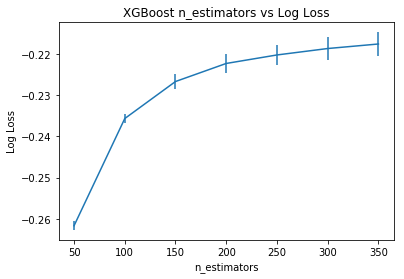

In [49]:
# Default XGBClassifier
model = XGBClassifier()

# Setting the parameters for hyperparameter tuning where number of estimators are being tuned
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)

#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=3)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
xgb_grid_best_params1 = grid_result.best_params_
print("Best score: %f using parameter %s" % (grid_result.best_score_, xgb_grid_best_params1))

mean_score = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean_score, std, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
    
# plot
plt.errorbar(n_estimators, mean_score, yerr=std)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

**Comment:**

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=350 resulting in a log loss of -0.213537, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

### Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [50]:
# Default classifier model
model = XGBClassifier()

#tuning the tree depth hyperparameter
max_depth = range(1, 11, 2)
param_grid = dict(max_depth=max_depth)

#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=3, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
xgb_grid_best_params2 =grid_result.best_params_
print("Best: %f using %s" % (grid_result.best_score_, xgb_grid_best_params2))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   13.9s finished


Best: -0.214226 using {'max_depth': 7}
-0.334568 (0.001706) with: {'max_depth': 1}
-0.235648 (0.001168) with: {'max_depth': 3}
-0.218397 (0.001182) with: {'max_depth': 5}
-0.214226 (0.002847) with: {'max_depth': 7}
-0.219954 (0.004157) with: {'max_depth': 9}


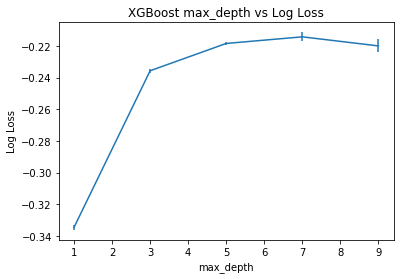

In [51]:
# plotting curve for log loss against max depth of decision tree
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

**Comment:**

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 and then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tuning both Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 5-fold cross validation. A total of 4*4*10 or 160 models will be trained and evaluated.



In [52]:
# default xgboost model
model = XGBClassifier()

# tuning both number of trees and depth of trees
n_estimators = [350, 300, 250, 200]
max_depth = [5, 6, 7, 8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

#kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=5, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
xgb_grid_best_params =grid_result.best_params_
print("Best: %f using %s" % (grid_result.best_score_, xgb_grid_best_params))
mean = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean, std, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  5.0min finished


Best: -0.210675 using {'max_depth': 6, 'n_estimators': 200}
-0.211601 (0.006187) with: {'max_depth': 5, 'n_estimators': 350}
-0.211081 (0.006316) with: {'max_depth': 5, 'n_estimators': 300}
-0.210752 (0.006319) with: {'max_depth': 5, 'n_estimators': 250}
-0.211277 (0.006107) with: {'max_depth': 5, 'n_estimators': 200}
-0.215014 (0.007572) with: {'max_depth': 6, 'n_estimators': 350}
-0.213184 (0.007021) with: {'max_depth': 6, 'n_estimators': 300}
-0.211525 (0.007068) with: {'max_depth': 6, 'n_estimators': 250}
-0.210675 (0.006724) with: {'max_depth': 6, 'n_estimators': 200}
-0.222687 (0.008092) with: {'max_depth': 7, 'n_estimators': 350}
-0.218694 (0.007299) with: {'max_depth': 7, 'n_estimators': 300}
-0.215747 (0.007315) with: {'max_depth': 7, 'n_estimators': 250}
-0.213064 (0.007054) with: {'max_depth': 7, 'n_estimators': 200}
-0.231580 (0.008832) with: {'max_depth': 8, 'n_estimators': 350}
-0.226408 (0.008376) with: {'max_depth': 8, 'n_estimators': 300}
-0.221835 (0.008298) with: {'m

In [11]:
# plot to show relation between depth and number of decision trees in the model
#scores = np.array(mean).reshape(len(max_depth), len(n_estimators))
#for i, value in enumerate(max_depth):
#    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
#plt.legend()
#plt.xlabel('n_estimators')
#plt.ylabel('Log Loss')
#plt.savefig('n_estimators_vs_max_depth.png')

**Comment:**

We can see that the best result was achieved with a n_estimators=200 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=200, max_depth=6).

We can plot the relationship between each series of max_depth values for a given n_estimators. Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation  is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters


In [55]:
tuned_xgb_grid = grid_result.best_estimator_

In [56]:
xgb_tuned_auc = evaluate(tuned_xgb_grid,X_train,y_train, X_test, y_test)

print('AUC for tuned random forest model using grid search : ' + str(xgb_tuned_auc))

AUC for tuned random forest model using grid search : 0.915339238258557


## Results:

The AUC for tuned XGBoost model (0.9153258319850854) is higher than tuned random forest model (0.9034520061024371)

In [57]:
model_summary = pd.DataFrame({
    'Classification Model': ['Random Forest','Tuned Random Forest with randomized search', 'Tuned Random Forest with grid search', 'XGBoost', 'Tuned XGBoost'],
    'HyperParameters Used': [rf_params,rf_random_best_params,rf_grid_best_params,xgBoostClassifierModel,xgb_grid_best_params],
     'AUC': [rf_default,rf_random_tuned,rf_grid_tuned_auc,xgb_auc,xgb_tuned_auc]})
    
model_summary.sort_values(by='AUC', ascending=False)

,Classification Model,HyperParameters Used,AUC
4,Tuned XGBoost,"{'max_depth': 6, 'n_estimators': 200}",0.915339
3,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.907323
1,Tuned Random Forest with randomized search,"{'n_estimators': 175, 'min_samples_split': 5, ...",0.906854
2,Tuned Random Forest with grid search,"{'bootstrap': False, 'max_features': 'auto', '...",0.906238
0,Random Forest,"{'bootstrap': True, 'class_weight': None, 'cri...",0.896186


## Part B

    * Logistic Regression

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression

In [59]:
# categorical price column is transformed to have price as 1 if it is greater than median price else 0

features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [60]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [61]:
price_cat_log = features['price_cat_log']
y_log = price_cat_log

In [62]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [63]:
# instantiate logistic regression object and train on training data
logreg=LogisticRegression()
logreg.fit(X_train_log,y_train_log)

print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
# let us fit a logit regression model to get the coefficients
logit_model = sm.Logit(y_train_log,X_train_log)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Wed, 30 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        20:51:27   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

**Comment:**

Looking at the z scores, we know that, sqft_living is the most significant feature to predict the house price followed by yr_built and then the rest.

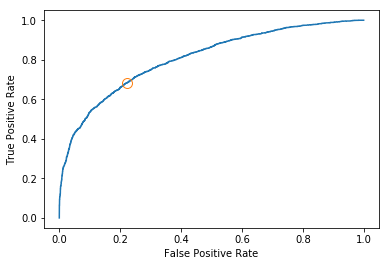

In [65]:
# plotting a roc curve to get the auc
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds = roc_curve(y_test_log,logreg.decision_function(X_test_log))  # to predict confidence scores for samples

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff = np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [66]:
from sklearn import metrics

logistic_auc = metrics.auc(falsepos, truepos)
print("AUC for logistic regression model :", logistic_auc)

AUC for logistic regression model : 0.8078695178147917


## Results

In [67]:
model_summary = pd.DataFrame({
    'Classification Model': ['Random Forest','Tuned Random Forest with randomized search', 'Tuned Random Forest with grid search', 'XGBoost', 'Tuned XGBoost','Logistic Regression'],
    'HyperParameters Used': [rf_params,rf_random_best_params,rf_grid_best_params,xgBoostClassifierModel,xgb_grid_best_params,logreg],
     'AUC': [rf_default,rf_random_tuned,rf_grid_tuned_auc,xgb_auc,xgb_tuned_auc,logistic_auc]})
    
model_summary.sort_values(by='AUC', ascending=False)

,Classification Model,HyperParameters Used,AUC
4,Tuned XGBoost,"{'max_depth': 6, 'n_estimators': 200}",0.915339
3,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.907323
1,Tuned Random Forest with randomized search,"{'n_estimators': 175, 'min_samples_split': 5, ...",0.906854
2,Tuned Random Forest with grid search,"{'bootstrap': False, 'max_features': 'auto', '...",0.906238
0,Random Forest,"{'bootstrap': True, 'class_weight': None, 'cri...",0.896186
5,Logistic Regression,"LogisticRegression(C=1.0, class_weight=None, d...",0.807870


## REGRESSION TECHNIQUES

## Part C

    * Bagging Algo : Random Forest Regressor
    * Boosting Algo : XGBoost Regressor

### Random Forest based Regression

To look at the available hyperparameters, we can create a random forest and examine the default values.

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
rf_default_params = rf_reg.get_params()
print(rf_default_params)

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Hyperparameters:

* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [8]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Hyperparameter tuning using Random Search Cross Validation

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [100,150,200,250]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [None,1,2,3]
# Minimum number of samples required to split a node
min_samples_split = [5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4]
# samples drawn of same size of population with repetition?
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                'bootstrap' : bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [None, 1, 2, 3],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 3, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [100, 150, 200, 250]}


In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid, n_iter = 70, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 70 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:  3.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=70, n_jobs=-1,
          param_distributions={'n_estimators': [100, 150, 200, 250], 'max_features': ['auto', 'sqrt'], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 3, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [12]:
# function to evaluate the accuracy of the model

def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance:')
    print('Mean ABsolute Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%'.format(accuracy))
    
    return accuracy

In [14]:
# fitting the base model and evaluating its accuracy in terms of mape
rf_reg.fit(X_train_reg, y_train_reg)
rf_default_accuracy = evaluate_reg(rf_reg, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 74999.2650
Accuracy = 86.14%


In [21]:
# get the best parameters
rf_random_tuned_params = rf_random.best_params_
rf_random_tuned_params

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [16]:
# evaluate the tuned model to find its accuracy on test data
rf_random_params = rf_random.best_estimator_
rf_random_tuned_accuracy = evaluate_reg(rf_random, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 69888.5983
Accuracy = 87.03%


### Grid Search with Cross Validation

In [17]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None, 1, 2, 3],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,4],
    'min_samples_split': [5, 10],
    'n_estimators': [100, 150, 200, 250]
}
# Create a based model
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [18]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 12.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'max_depth': [None, 1, 2, 3], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [2, 4], 'min_samples_split': [5, 10], 'n_estimators': [100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [19]:
# parameters selected to tune the model
rf_grid_tuned_params = grid_search.best_params_
rf_grid_tuned_params

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 250}

In [20]:
# evaluating tuned model accuracy
rf_grid_params = grid_search.best_estimator_
rf_grid_tuned_accuracy = evaluate_reg(rf_grid_params, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 69888.5983
Accuracy = 87.03%


## Results

In [22]:
model_summary = pd.DataFrame({
    'Regression Model': ['Random Forest','Tuned Random Forest with randomized search', 'Tuned Random Forest with grid search'],
    'HyperParameters Used': [rf_default_params,rf_random_tuned_params,rf_grid_tuned_params],
     'Accuracy (MAPE)': [rf_default_accuracy,rf_random_tuned_accuracy,rf_grid_tuned_accuracy]})
    
model_summary.sort_values(by='Accuracy (MAPE)', ascending=False)

,Regression Model,HyperParameters Used,Accuracy (MAPE)
1,Tuned Random Forest with randomized search,"{'n_estimators': 250, 'min_samples_split': 5, ...",87.032102
2,Tuned Random Forest with grid search,"{'bootstrap': True, 'max_depth': None, 'max_fe...",87.032102
0,Random Forest,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",86.135613


## XGBoost Regression (eXtreme Gradient Boosting)

In [23]:
from xgboost import XGBRegressor

In [24]:
xgboost = XGBRegressor()
xgboost.fit(X_train_reg, y_train_reg)
xbg_default_accuracy = evaluate_reg(xgboost, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 81234.4943
Accuracy = 84.69%


In [25]:
# Getting parameters used in default model
xgb_params = xgboost.get_params
xgb_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)>

In [26]:
# Tuning n_estimators parameter using GridSearchCV
xgboost = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)

# Fitting the grid search
grid_search = GridSearchCV(xgboost, param_grid, n_jobs=-1, cv=3)
grid_result = grid_search.fit(X_train_reg, y_train_reg)

# summarize results
print("Best score : %f Using parameter %s" % (grid_result.best_score_, grid_result.best_params_))
mean_score = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean_score, std, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best score : 0.876501 Using parameter {'n_estimators': 350}
0.818302 (0.013340) with: {'n_estimators': 50}
0.851528 (0.011824) with: {'n_estimators': 100}
0.861390 (0.011211) with: {'n_estimators': 150}
0.867935 (0.010265) with: {'n_estimators': 200}
0.872402 (0.009229) with: {'n_estimators': 250}
0.874735 (0.008901) with: {'n_estimators': 300}
0.876501 (0.008722) with: {'n_estimators': 350}


In [27]:
# Tuning max_depth parameter using GrdiSearchCV
xgb = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
# Fitting grid search
grid_search = GridSearchCV(xgb, param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best score : %f Using parameter %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

range(1, 11, 2)
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   15.3s finished


Best score : 0.877688 Using parameter {'max_depth': 7}
0.712196 (0.010223) with: {'max_depth': 1}
0.851528 (0.011824) with: {'max_depth': 3}
0.875791 (0.009968) with: {'max_depth': 5}
0.877688 (0.007551) with: {'max_depth': 7}
0.872014 (0.005133) with: {'max_depth': 9}


In [28]:
# Tuning both n_estimators and max_depth parameters using GridSearchCV
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7,8]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)

# fitting grid search
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=3, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)

# summarize results
print("Best score: %f Using parameters %s" % (grid_result.best_score_, grid_result.best_params_))
mean_score = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(mean_score, std, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.1min finished


Best score: 0.887972 Using parameters {'max_depth': 4, 'n_estimators': 400}
0.887218 (0.009489) with: {'max_depth': 4, 'n_estimators': 300}
0.887597 (0.009402) with: {'max_depth': 4, 'n_estimators': 350}
0.887972 (0.009153) with: {'max_depth': 4, 'n_estimators': 400}
0.883276 (0.010134) with: {'max_depth': 5, 'n_estimators': 300}
0.883734 (0.009931) with: {'max_depth': 5, 'n_estimators': 350}
0.883944 (0.010202) with: {'max_depth': 5, 'n_estimators': 400}
0.879743 (0.009321) with: {'max_depth': 6, 'n_estimators': 300}
0.879751 (0.009349) with: {'max_depth': 6, 'n_estimators': 350}
0.879795 (0.009419) with: {'max_depth': 6, 'n_estimators': 400}
0.880585 (0.008073) with: {'max_depth': 7, 'n_estimators': 300}
0.880570 (0.008347) with: {'max_depth': 7, 'n_estimators': 350}
0.880433 (0.008316) with: {'max_depth': 7, 'n_estimators': 400}
0.878395 (0.007539) with: {'max_depth': 8, 'n_estimators': 300}
0.878382 (0.007588) with: {'max_depth': 8, 'n_estimators': 350}
0.878271 (0.007621) with: {'

In [29]:
xgb_tuned_params = grid_result.best_estimator_
xgb_tuned_params

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
xgb_tuned_params.fit(X_train_reg, y_train_reg)
xgb_tuned_accuracy = evaluate_reg(xgb_tuned_params, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 67103.0821
Accuracy = 87.34%


## Results:

XGBoost Algorithm provides better predictions than Random Forest for the regression problem while predicting the house prices for out of sample data

In [31]:
model_summary = pd.DataFrame({
    'Regression Model': ['Random Forest','Tuned Random Forest with randomized search', 'Tuned Random Forest with grid search', 'XGBoost', 'Tuned XGBoost'],
    'HyperParameters Used': [rf_default_params,rf_random_tuned_params,rf_grid_tuned_params,xgb_params, xgb_tuned_params],
     'Accuracy (MAPE)': [rf_default_accuracy,rf_random_tuned_accuracy,rf_grid_tuned_accuracy, xbg_default_accuracy, xgb_tuned_accuracy]})
    
model_summary.sort_values(by='Accuracy (MAPE)', ascending=False)

,Regression Model,HyperParameters Used,Accuracy (MAPE)
4,Tuned XGBoost,"XGBRegressor(base_score=0.5, booster='gbtree',...",87.344196
1,Tuned Random Forest with randomized search,"{'n_estimators': 250, 'min_samples_split': 5, ...",87.032102
2,Tuned Random Forest with grid search,"{'bootstrap': True, 'max_depth': None, 'max_fe...",87.032102
0,Random Forest,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",86.135613
3,XGBoost,<bound method XGBModel.get_params of XGBRegres...,84.692553


## Part D

* For Part D:
    * Linear Regression with Regularization ( Ridge Regression and Lasso Regression)

## LINEAR REGRESSION

In [32]:
from sklearn import linear_model

In [33]:
# Fitting linear regression to training set
lr = linear_model.LinearRegression()
lr.fit(X_train_reg, y_train_reg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
# get the parameters for default model
lr_params = lr.get_params
lr_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

This shows that there is no hyperparameter in this regression model to tune. Now, let us look at what is the accuracy of the model -

In [35]:
# predict the default model accuracy
lr_accuracy = evaluate_reg(lr, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 117537.1969
Accuracy = 77.20%


Now, we can regularise the linear model using ridge regression to prevent overfitting of our model (reducing model complexity) and coefficient shrinkage. Along with shrinking coefficients, lasso performs feature selection as well. So we can use these methods to train our model and give better predictions. 

### Regularisation Techniques:

**Ridge:** It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.

**Lasso:** Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

### Ridge Regression

In [36]:
# Fitting regression to training set
rr = linear_model.Ridge(alpha=0.1, normalize=True)
rr.fit(X_train_reg, y_train_reg)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [37]:
# get the parameters for default model
rr_params = rr.get_params
rr_params

<bound method BaseEstimator.get_params of Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)>

This shows that we have 1 hyperparameter alpha which can be tuned to predict the the target variable. But before that, let us evaluate the accuracy of the base model without tuning the hyperparameter.

In [38]:
# predict the default model accuracy
rr_accuracy = evaluate_reg(rr, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 116876.7987
Accuracy = 77.35%


Let us now tune this model by setting the value of alpha and predict the target variable.
### Hyperparameter tuning for ridge regression

In [39]:
from sklearn.linear_model import RidgeCV

In [40]:
# Fitting regression to training set
# create and fit a ridge regression model, testing each alpha
ridge = linear_model.Ridge(alpha=0.1, normalize=True)
# Instantiate the grid search model
grid = RidgeCV(alphas=[1e-8,1e-7,1e-6,1e-5,1e-4, 1e-2, 1e-1, 10], normalize=True, cv = 5)

In [41]:
# Fit the grid search to the data
grid.fit(X_train_reg, y_train_reg)

RidgeCV(alphas=array([1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-02, 1.e-01, 1.e+01]),
    cv=5, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
    store_cv_values=False)

In [42]:
# get the best parameter
grid.alpha_

1e-06

In [43]:
# summarize the results of the grid search
#tuned_ridge = grid.best_estimator_
tuned_ridge_accuracy = evaluate_reg(grid, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 117482.7778
Accuracy = 77.23%


### Lasso Regression

In [44]:
# Fitting lasso regression with default tuning parameter and normalized data to training set
lasso_r = linear_model.Lasso(alpha=0.1, normalize=True, max_iter = 1e5)
lasso_r.fit(X_train_reg, y_train_reg)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [45]:
# get the parameters for default model
lasso_params = lasso_r.get_params
lasso_params

<bound method BaseEstimator.get_params of Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=100000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)>

This shows that we have a hyperparameter alpha which can be tuned to predict better results. But first let us evaluate the accuracy of this base model.

In [46]:
# predict the default model accuracy
lasso_accuracy = evaluate_reg(lasso_r, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 117498.5897
Accuracy = 77.22%


Let us now tune this model by setting the value of alpha and predict the target variable.
### Hyperparameter tuning for lasso regression

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LassoCV

In [48]:
#Tuning the value of alpha and  max_iter
#alpha_lasso = np.array([1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10])
#param_grid=dict(alpha=alpha_lasso)
alphas = np.logspace(-4, -.5, 30)

In [49]:
# Fitting regression to training set
# create and fit a ridge regression model, testing each alpha
lasso = linear_model.Lasso(alpha=0.1, normalize=True, max_iter = 1e5)
# Instantiate the grid search model
lasso_grid = LassoCV(alphas = alphas, normalize=True, max_iter = 1e4, cv = 3)

In [50]:
# Fit the grid search to the data
lasso_grid.fit(X_train_reg, y_train_reg)

C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\amiga\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

LassoCV(alphas=array([1.00000e-04, 1.32035e-04, 1.74333e-04, 2.30181e-04, 3.03920e-04,
       4.01281e-04, 5.29832e-04, 6.99564e-04, 9.23671e-04, 1.21957e-03,
       1.61026e-03, 2.12611e-03, 2.80722e-03, 3.70651e-03, 4.89390e-03,
       6.46167e-03, 8.53168e-03, 1.12648e-02, 1.48735e-02, 1.96383e-02,
       2.59294e-02, 3.42360e-02, 4.52035e-02, 5.96846e-02, 7.88046e-02,
       1.04050e-01, 1.37382e-01, 1.81393e-01, 2.39503e-01, 3.16228e-01]),
    copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=10000.0,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [51]:
# get best parameter which gives maximum accuracy
lasso_grid.alpha_

0.0196382800192977

In [52]:
# summarize the results of the grid search
tuned_lasso_accuracy = evaluate_reg(lasso_grid, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 117563.3924
Accuracy = 77.20%


## Results

The accuracy after tuning the lasso regression model increased very slightly by 0.02 as compared to that of linear regression model

In [53]:
model_summary = pd.DataFrame({
    'Regression Model': ['Linear Regression','Ridge Regression','Tuned Ridge Model', 'Lasso Regression','Tuned Lasso Model'],
    'HyperParameters Used': [lr_params, rr_params, grid.alpha_, lasso_params, lasso_grid.alpha_],
     'Accuracy (MAPE)': [lr_accuracy, rr_accuracy, tuned_ridge_accuracy, lasso_accuracy, tuned_lasso_accuracy]})
    
model_summary.sort_values(by='Accuracy (MAPE)', ascending=False)

,Regression Model,HyperParameters Used,Accuracy (MAPE)
1,Ridge Regression,<bound method BaseEstimator.get_params of Ridg...,77.353455
2,Tuned Ridge Model,1e-06,77.233093
3,Lasso Regression,<bound method BaseEstimator.get_params of Lass...,77.224517
4,Tuned Lasso Model,0.0196383,77.202161
0,Linear Regression,<bound method BaseEstimator.get_params of Line...,77.195907


## Part E

* For Part E:
    * Decision Tree Regression

## Decision Tree Regression

In [54]:
# importing required library
from sklearn.tree import DecisionTreeRegressor

In [55]:
# fit the default decision tree and evaluate the results
dt = DecisionTreeRegressor()
dt.fit(X_train_reg, y_train_reg)
dt_default_accuracy = evaluate_reg(dt, X_test_reg, y_test_reg)

Model Performance:
Mean ABsolute Error: 100705.2913
Accuracy = 81.60%


In [56]:
# get parameters of default model
dt_params = dt.get_params
dt_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')>

### HyperParameter Tuning with RandomizedSearchCV

In [57]:
# Create random grid based on the results of random search 
random_grid = {
    'max_depth': [None, 1, 3,4,5,6,7],
    'max_features': [None, 1, 2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,5,7],
}
# Create a based model
dt = DecisionTreeRegressor()

# Instantiate the random search model
dt_random_tuned = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 90, cv = 3, 
                             verbose=2, random_state=42, n_jobs = -1)

In [58]:
# fitting the tuned model
dt_random_tuned.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 207 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 255 out of 270 | elapsed:    8.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    8.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid='warn', n_iter=90, n_jobs=-1,
          param_distributions={'max_depth': [None, 1, 3, 4, 5, 6, 7], 'max_features': [None, 1, 2, 3], 'min_samples_leaf': [2, 3, 4], 'min_samples_split': [2, 3, 5, 7]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [59]:
# get the best parameters
dt_tuned_params = dt_random_tuned.best_params_
dt_tuned_params

{'min_samples_split': 3,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': None}

In [60]:
# get the best estimator and evaluate the result for tuned model
dt_tuned = dt_random_tuned.best_estimator_
dt_tuned_accuracy = evaluate_reg(dt_tuned,X_test_reg, y_test_reg)
print('\nAccuracy for decision tree model: ', dt_default_accuracy)
print('Accuracy for tuned decision tree model using randomized search : ' + str(dt_tuned_accuracy))

Model Performance:
Mean ABsolute Error: 93387.4632
Accuracy = 82.85%

Accuracy for decision tree model:  81.60287342980111
Accuracy for tuned decision tree model using randomized search : 82.85239237497387


In [61]:
model_summary = pd.DataFrame({
    'Regression Model': ['Decision Tree Regressor','Tuned Decision Tree'],
    'HyperParameters Used': [dt_params, dt_tuned_params],
     'Accuracy (MAPE)': [dt_default_accuracy,dt_tuned_accuracy]})
    
model_summary.sort_values(by='Accuracy (MAPE)', ascending=False)

,Regression Model,HyperParameters Used,Accuracy (MAPE)
1,Tuned Decision Tree,"{'min_samples_split': 3, 'min_samples_leaf': 4...",82.852392
0,Decision Tree Regressor,<bound method BaseEstimator.get_params of Deci...,81.602873


## RESULTS/CONCLUSION

Below are the tables for classification and regression comparing many models along with the hyperparameters used and evaluation metric to show which model outperformed for classifying/predicting the house price.

### Classification Model Comparison

In [68]:
model_summary = pd.DataFrame({
    'Classification Model': ['Random Forest','Tuned Random Forest with randomized search', 'Tuned Random Forest with grid search', 'XGBoost', 'Tuned XGBoost','Logistic Regression'],
    'HyperParameters Used': [rf_params,rf_random_best_params,rf_grid_best_params,xgBoostClassifierModel,xgb_grid_best_params,logreg],
     'AUC': [rf_default,rf_random_tuned,rf_grid_tuned_auc,xgb_auc,xgb_tuned_auc,logistic_auc]})
    
model_summary.sort_values(by='AUC', ascending=False)

,Classification Model,HyperParameters Used,AUC
4,Tuned XGBoost,"{'max_depth': 6, 'n_estimators': 200}",0.915339
3,XGBoost,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.907323
1,Tuned Random Forest with randomized search,"{'n_estimators': 175, 'min_samples_split': 5, ...",0.906854
2,Tuned Random Forest with grid search,"{'bootstrap': False, 'max_features': 'auto', '...",0.906238
0,Random Forest,"{'bootstrap': True, 'class_weight': None, 'cri...",0.896186
5,Logistic Regression,"LogisticRegression(C=1.0, class_weight=None, d...",0.807870


### Regression Model Comparison

In [63]:
model_summary = pd.DataFrame({
    'Regression Model': ['Random Forest','Tuned Random Forest with randomized search', 'Tuned Random Forest with grid search', 'XGBoost', 'Tuned XGBoost',
                         'Linear Regression','Ridge Regression','Tuned Ridge Model', 'Lasso Regression','Tuned Lasso Model', 'Decision Tree Regressor','Tuned Decision Tree'],
    'HyperParameters Used': [rf_default_params,rf_random_tuned_params,rf_grid_tuned_params,xgb_params, xgb_tuned_params,
                             lr_params, rr_params, grid.alpha_, lasso_params, lasso_grid.alpha_, dt_params, dt_tuned_params],
     'Accuracy (MAPE)': [rf_default_accuracy,rf_random_tuned_accuracy,rf_grid_tuned_accuracy, xbg_default_accuracy, xgb_tuned_accuracy,
                         lr_accuracy, rr_accuracy, tuned_ridge_accuracy, lasso_accuracy, tuned_lasso_accuracy, dt_default_accuracy,dt_tuned_accuracy]})
    
model_summary.sort_values(by='Accuracy (MAPE)', ascending=False)

,Regression Model,HyperParameters Used,Accuracy (MAPE)
4,Tuned XGBoost,"XGBRegressor(base_score=0.5, booster='gbtree',...",87.344196
1,Tuned Random Forest with randomized search,"{'n_estimators': 250, 'min_samples_split': 5, ...",87.032102
2,Tuned Random Forest with grid search,"{'bootstrap': True, 'max_depth': None, 'max_fe...",87.032102
0,Random Forest,"{'bootstrap': True, 'criterion': 'mse', 'max_d...",86.135613
3,XGBoost,<bound method XGBModel.get_params of XGBRegres...,84.692553
11,Tuned Decision Tree,"{'min_samples_split': 3, 'min_samples_leaf': 4...",82.852392
10,Decision Tree Regressor,<bound method BaseEstimator.get_params of Deci...,81.602873
6,Ridge Regression,<bound method BaseEstimator.get_params of Ridg...,77.353455
7,Tuned Ridge Model,1e-06,77.233093
8,Lasso Regression,<bound method BaseEstimator.get_params of Lass...,77.224517


## CONTRIBUTION

1. Added initial data auditing and EDA for target variable
2. Updated the evaluation metric for classification techniques to AUC for all models
3. Updated the heatmap and matshow with interpretation of the same
4. Corrected the training and testing parameter to be passed while performing regression
5. Evaluation of regression is done on the basis of accuracy (MAPE) for all models
6. Optimised the hyperparameters in tree based models for better results
7. Performed Linear regression along with both regularization techniques (Ridge and Lasso)
8. Optimized the hyperparameter in ridge and lasso regression
9. Added necessary comments to explain the code
10. Added results section after each method to compare models consisting of hyperparameters and evaluation metric

Personal contribution: 40%
External references: 60%

## CITATIONS/REFERENCES

1. https://www.kaggle.com/harlfoxem/housesalesprediction
2. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html
3. https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
4. https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/
5. https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
* Random forest Classifer : https://www.datacamp.com/community/tutorials/random-forests-classifier-python
* Random Forest Regression : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
* XGBoost Classifier & XGBoost Regression : 
    * https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
    * https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
* Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/
* Linear Regression : https://towardsdatascience.com/linear-regression-detailed-view-ea73175f6e86
* Decision Tree Rgeressor : https://scikit-learn.org/stable/modules/tree.html

## LICENSE

Copyright 2019, Ami Gandhi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.   